In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# READ THE DATA

In [2]:
url='https://raw.githubusercontent.com/ham09ak/house_price_prediction/main/data'
data = pd.read_csv(url)

In [ ]:
data_original=data.copy()

In [ ]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


the dataset has a house where the house has 33 bedrooms , seems to be a massive house and would be interesting to know more about it as we progress

In [ ]:
data.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

# DATA VISUALIZATION

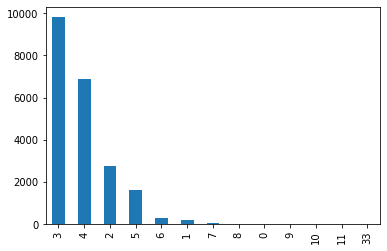

In [ ]:
data['bedrooms'].value_counts().plot(kind='bar')

As we can see 3 bedrooms houses are most commonly sold followed by 4 bedrooms.

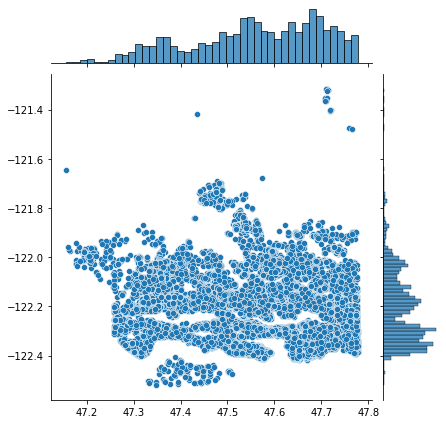

In [ ]:
sns.jointplot(x=data.lat.values,y=data.long.values) #Joinplot function helps us see the concentration of data and placement of data
plt.show()

For latitude between -47.7 and -48.8 there are many houses , which would mean that maybe it’s an ideal location isn’t it ? But when we talk about longitude we can see that concentration is high between -122.2 to -122.4.Which would mean that most of the buy’s has been for this particular location.

Text(0.5, 1.0, 'price vs sq_livin')

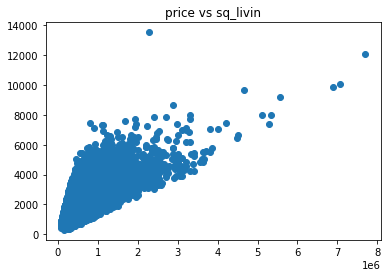

In [ ]:
plt.scatter(data.price,data.sqft_living)
plt.title("price vs sq_livin")


*   The data points seem to be in linear direction.
*   The house with the highest square feet was sold for very less wich doesnt make sense


Text(0.5, 1.0, 'price vs Locationin term of longlitude')

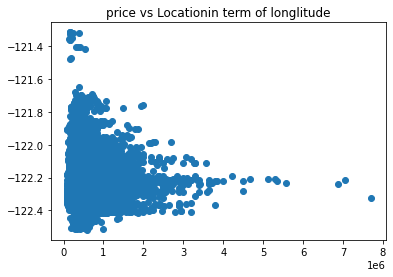

In [ ]:
plt.scatter(data.price,data.long)
plt.title("price vs Locationin term of longlitude")

Text(0.5, 1.0, 'price vs Locationin term of laltitude')

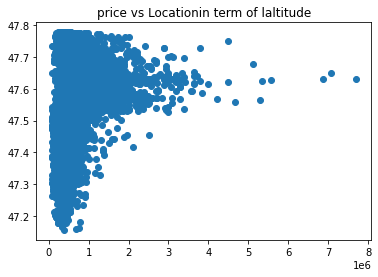

In [ ]:
plt.scatter(data.price,data.lat)
plt.title("price vs Locationin term of laltitude")

Text(0.5, 1.0, 'price vs numbers of bedrooms')

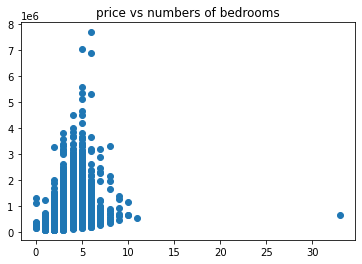

In [ ]:
plt.scatter(data.bedrooms,data.price)
plt.title("price vs numbers of bedrooms")

In [ ]:
bins=[0,75000,540088,7700000]
group=['Low','Average','High']
data['price_bin']=pd.cut(data['price'],bins,labels=group)

Text(0, 0.5, 'percentage')

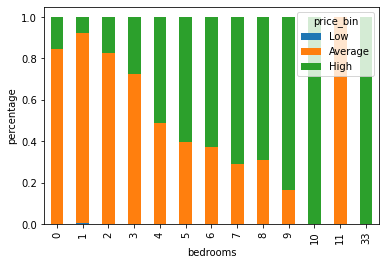

In [ ]:
price_bin=pd.crosstab(data['bedrooms'],data['price_bin'])
price_bin.div(price_bin.sum(1).astype(float), axis=0).plot(kind="bar",stacked=True)
plt.xlabel('bedrooms')
plt.ylabel('percentage')

In [ ]:
data=data.drop(price_bin,axis=1)

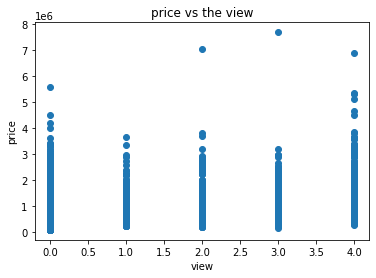

<function seaborn.utils.despine>

In [ ]:
plt.scatter(data.view,data.price )
plt.title("price vs the view")
plt.xlabel("view")
plt.ylabel("price")
plt.show()
sns.despine

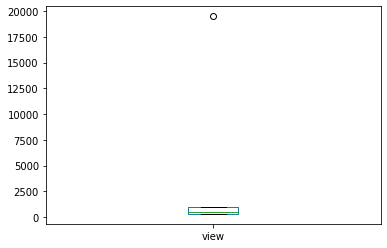

In [ ]:
data['view'].value_counts().plot(kind='box')

the variable view have an outlier that have to be fixed later

Text(0, 0.5, 'the prices')

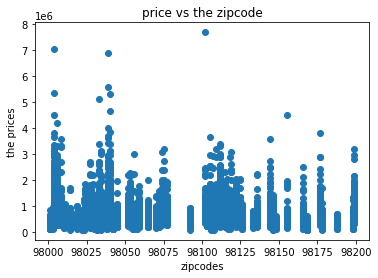

In [ ]:
plt.scatter(data.zipcode, data.price)
plt.title("price vs the zipcode")
plt.xlabel("zipcodes")
plt.ylabel("the prices")

we can see that the zip code 98100 is the most high price place while most sales are in the zipcode between 98000 AND 98050 and also between98100 and 98125

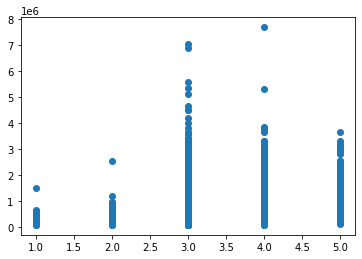

In [ ]:
plt.scatter(data.condition, data.price)
plt.show()

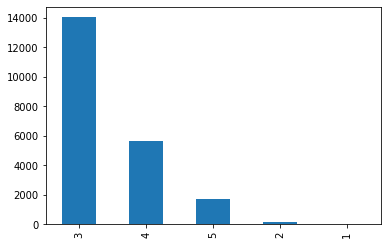

In [ ]:
data.condition.value_counts().plot(kind='bar')

the condition numbered 3 make the most sales

# Modeling 

In [3]:
New_data=data.drop('id',axis=1)

In [4]:
y=data.price
X=New_data.drop('price',axis=1)

In [5]:
NX = pd.get_dummies(X)

In [6]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(NX,y, test_size=0.3)

In [7]:
from sklearn import linear_model
from sklearn.metrics import accuracy_score

In [ ]:
model = linear_model.LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
model.score(x_test, y_test)

0.6926324551062104